##Engenharia de computação - IFPB

##Estatística Aplicada a Computação 

##Aluno: Rafael Victor Cordeiro Muniz

Primeiro é necessário importar as bilbiotecas necessárias para os códigos

In [ ]:
#Importando bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # Biblioteca utilizada para os gráficos

# Melhorando a visualização dos gráficos
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 15

#Apresentação

##Nesse projeto, o aluno terá de trabalhar com dois conjuntos de dados reais, oriundos do Instituto Chico Mendes de Conservação da Biodiversidade (ICMBio), disponíveis na url http://www.icmbio.gov.br/acessoainformacao/plano-de-dados-abertos.html. 
##Para cada conjunto de dados, serão pedidas algumas análises, das quais se espera que o aluno seja capaz de apresentar código e discussão (explicar a escolha de cada função/comando usado, bem como interpretação dos resultados encontrados) em um Jupyter Notebook.

Link 1: http://www.icmbio.gov.br/acessoainformacao/images/stories/PDA/Planilhas/Planilhas_CSV/DIMIF-queima.csv

Link 2: http://www.icmbio.gov.br/acessoainformacao/images/stories/PDA/Planilhas/Planilhas_CSV/DIMIF_desmatamento.csv


#Parte I: Queimadas em unidades de conservação ambiental no Brasil

##O primeiro conjunto de dados link 1 traz dados sobre queimadas em unidades de conservação ambiental (UC). Usando quaisquer ferramentas trabalhadas na disciplina, responda as seguintes situações:

##1.1 - Em que governo se criou mais UCs, de acordo com os dados? Use gráficos e tabelas para ilustrar sua resposta;

O primeiro passo será importar o arquivo CSV, que nesse caso, foi colocado no arquivo por meio de upload, após isso vamos usar a função 'read_csv', com o diretório do arquivo, para introduzir o arquivo ao programa, então iremos atribuir os dados à uma variável que será nosso DataFrame.

In [ ]:
QueimadasUC = pd.read_csv("/content/DIMIF-queima.csv", sep=';') 

No trecho seguinte temos:
- Criação de uma Serie contendo todo os anos do Dataframe;
- Criação de uma lista para colocar os presidentes em exercício em cada ano;
- Uso de uma função para transformar o ano dado como parâmetro no nome do presidente daquele período;
- For para colocar os nomes dos presidentes de acordo com os anos da Serie "Anos" e a transformando a lista em uma Serie;
- Um gráfico horizontal com os 9 primeiros presidentes da Serie e relacionando com a quantidade de UC's criadas;
- Colocação do título do gráfico com a função "title".

Text(0.5, 1.0, "UC's criadas por governo")

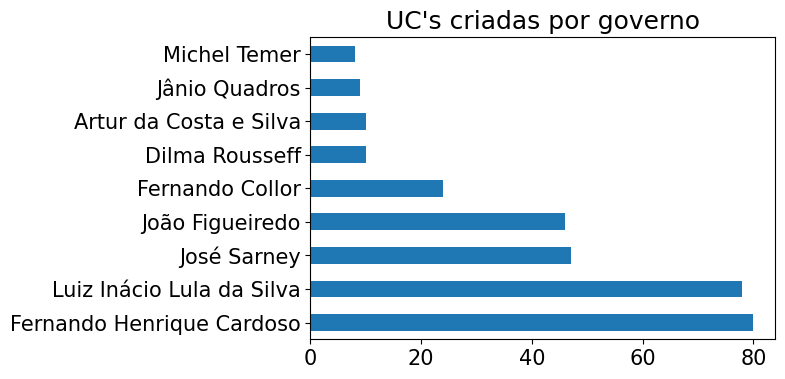

In [ ]:
Anos = pd.Series(QueimadasUC['Ano de criação']) 
Presidentes = [] 

def presidente(ano): 
  presidente = ""

  if ano >= 1956 and ano < 1961: presidente = "Juscelino Kubitschek"
  elif ano >= 1961 and ano < 1962: presidente = "Jânio Quadros"
  elif ano >= 1962 and ano < 1964: presidente = "João Goulart"
  elif ano >= 1964 and ano < 1967: presidente = "Castelo Branco"
  elif ano >= 1967 and ano < 1969: presidente = "Artur da Costa e Silva"
  elif ano >= 1969 and ano < 1974: presidente = "Emílio Garrastazu Médici"
  elif ano >= 1974 and ano < 1979: presidente = "Ernesto Geisel"
  elif ano >= 1979 and ano < 1985: presidente = "João Figueiredo"
  elif ano >= 1985 and ano < 1990: presidente = "José Sarney"
  elif ano >= 1990 and ano < 1993: presidente = "Fernando Collor"
  elif ano >= 1993 and ano < 1995: presidente = "Itamar Franco"
  elif ano >= 1995 and ano < 2003: presidente = "Fernando Henrique Cardoso"
  elif ano >= 2003 and ano < 2011: presidente = "Luiz Inácio Lula da Silva"
  elif ano >= 2011 and ano < 2016: presidente = "Dilma Rousseff"
  elif ano >= 2016 and ano < 2019: presidente = "Michel Temer"
  else: presidente = "Presidentes antes de 56"
  return presidente

for i in range(len(Anos)): Presidentes.append(presidente(Anos[i]))
Presidentes = pd.Series(Presidentes) 
Presidentes.value_counts().iloc[:9].plot.barh() 
plt.title("UC's criadas por governo") 

O processo utilizado aqui será a criação de duas Series contendo anos com mais ocorrências e a quantidade de anos. Então, será feito uma lista contendo  presidentes em ordem de anos com mais criações de UC's. 

Os passos tomados aqui são semelhantes ao código anterior, criando um for para colocar os nomes dos presidentes de acordo com os anos da Serie "Anos" e a transformando a lista em uma Serie.

Após isso será criado um dataframe contendo as informações das duas series e adicionado nomes as colunas e aos índices, com cada presidente que estava em exercício naquele tempo, para uma melhor visualização das informações. Com isso, será criada a tabela informativa.


In [ ]:
Anos = pd.Series(QueimadasUC['Ano de criação'].value_counts().iloc[:9].index) 
QuantAnos = pd.Series(QueimadasUC['Ano de criação'].value_counts().iloc[:9].values) 

Pres = [] 
for i in Anos: Pres.append(presidente(i)) 
Pres = pd.Series(Pres) 

RankingCriacaoUCs = pd.concat([Anos, QuantAnos], axis=1) 
RankingCriacaoUCs.columns = (['Ano', 'UCs criadas']) 
RankingCriacaoUCs.index = Pres 
RankingCriacaoUCs

,Ano,UCs criadas
Fernando Henrique Cardoso,2001,25
Luiz Inácio Lula da Silva,2006,22
Luiz Inácio Lula da Silva,2005,21
Fernando Henrique Cardoso,2002,20
José Sarney,1989,18
Fernando Collor,1990,15
José Sarney,1985,14
Fernando Henrique Cardoso,1998,13
João Figueiredo,1982,13


R: Como mostrado por meio da tabela e gráfico, mais se criou UC's no Governo Fernando Henrique Cardoso (1995 - 2003).

##1.2 - Construa um dataframe de bioma referencial por categoria de UC (dica: groupby) e construa um gráfico relacionando as duas variáveis;

Aqui utilizaremos a função 'crosstab' para criarmos um DataFrame unindo informações entre duas colunas do DataFrame original. Após isso, utilizaremos o Dataframe como base para criação do gráfico, que será na horizontal (plot.barh) para melhor visualisação das informações. Também empilharemos as informações em comuns (Stacked=True), para poupar espaço e ajudar na leitura. E então, colocaremos o gráfico na parte esquerda da legenda, para não haver informações sobrepostas e adicionaremos um título (.title).

Text(0.5, 1.0, "Quant. de UC's nos biomas")

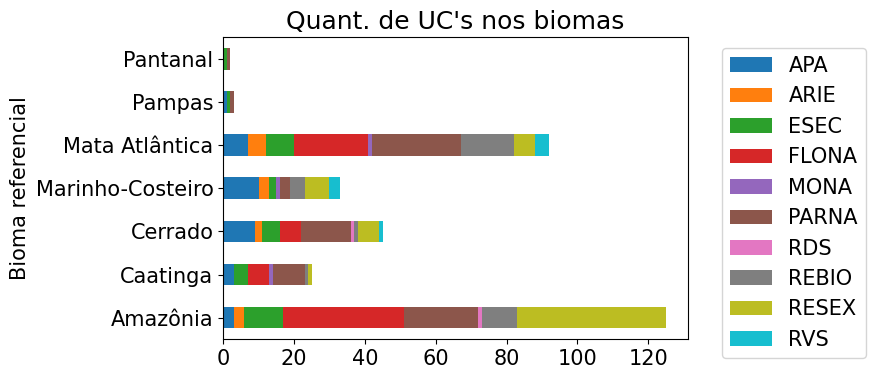

In [ ]:
Tabela = pd.crosstab(QueimadasUC['Bioma referencial'], QueimadasUC['Categoria da UC: sigla federal']) 
Tabela.plot.barh(stacked=True) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title("Quant. de UC's nos biomas") 

##1.3 - Monte um gráfico da quantidade de área queimada por ano, mostrando a evolução das queimadas;


Inicialmente, foi-se criada uma função para ajustar certos valores na coluna de área queimada em cada ano, pois, para poder manipular os valores, é preciso que eles não tenham ponto de milhar, tenham um separador de decimal como um ponto e não tenham valores NaN, para assim poder converter os valores para float64, e é isso que a função a seguir faz. 

In [ ]:
def ajustes(coluna): # remove NaN, tira ponto de milhar, troca vírgula por ponto, passa pra float
  coluna = coluna.dropna()
  coluna = coluna.apply(lambda x: x.replace('.',''))
  coluna = coluna.apply(lambda x: x.replace(',','.'))
  coluna = coluna.astype('float64')
  return coluna

Aqui temos a criação de 7 variáveis, correspondendo a soma (.sum) de todos os valores em cada coluna referente a quantidade de área queimada por ano, com a função 'ajustes', criada anteriormente.

In [ ]:
Area2012 = ajustes(QueimadasUC['Área queimada em 2012']).sum()
Area2013 = ajustes(QueimadasUC['Área queimada em 2013']).sum()
Area2014 = ajustes(QueimadasUC['Área queimada em 2014']).sum()
Area2015 = ajustes(QueimadasUC['Área queimada em 2015']).sum()
Area2016 = ajustes(QueimadasUC['Área queimada em 2016']).sum()
Area2017 = ajustes(QueimadasUC['Área queimada em 2017']).sum()
Area2018 = ajustes(QueimadasUC['Área queimada em 2018']).sum()

Para poder fazer um dataframe cocatenando (.concat) os valores com a quantidade de área queimada em todos os anos e com os anos correspondentes, foram criadas duas Series (pd.Series), uma com as variáveis criadas anteriormente unidas em uma única serie e outro com anos de cada queimada.

Apos isso foi colocada novos nomes para as colunas (.columns), para um entendimento das informações presentes.



In [ ]:
QuantAreasQueimadas = pd.Series([Area2012, Area2013, Area2014, Area2015, Area2016, Area2017, Area2018])
AnosAreasQueimadas = pd.Series([2012, 2013, 2014, 2015, 2016, 2017, 2018])
DataFrame = pd.concat([AnosAreasQueimadas, QuantAreasQueimadas], axis=1)
DataFrame.columns = ['Ano', 'Área queimada']

Aqui será criado o gráfico em linhas (.plot), especificando quais as colunas que irão servir como eixo X e Y, tirando também a legenga. Então, será colocado um título (plt.title) acima do gráfico.

Text(0.5, 1.0, 'Áreas queimadas por ano')

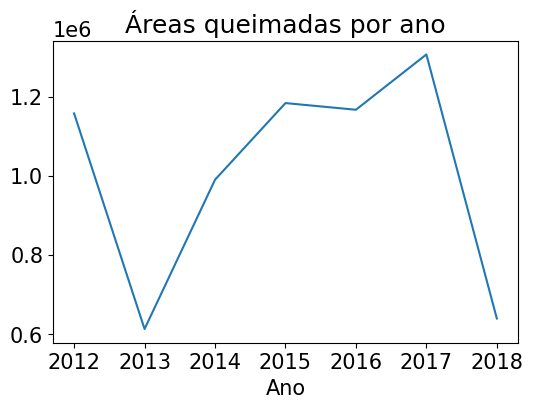

In [ ]:
DataFrame.plot(x='Ano', y='Área queimada',legend=False)
plt.title("Áreas queimadas por ano")

##1.4 - Construa uma tabela que relacione estados e área queimada, respondendo qual o estado que mais e o que menos teve área queimada nos anos computados na pesquisa.

Função que recebe a coluna de estados com o nome completo e remove toda a informação, fora a sigla do estado. O retorno da função já é dado como uma Series.

In [ ]:
def estadosCorrespondentes(EstadosColuna): # cria lista com Estados correspondentes de cada área queimada obtida anteriormente

  Estados = EstadosColuna.apply(lambda x: x[-2:])
  Estados = pd.Series(Estados)
  return Estados

A função a seguir utiliza a função "ajustes" da questão anterior para consertar os valores de área queimada, que contém vírgulas como separador de decimal e pontos para unidades de milhar. Após isso, utiliza a função anteiror para criar uma Serie com o nome de todos os estados por sigla.

Então, utiliza as duas series feitas para criarem um dataframe, contendo os anos e sigla de estados, a partir da concatenação (.concat) na vertical (axis=1). As funções .dropna e reset_index são utilizadas para remover a ocorrência de valores NaN e recolocar os índices em ordem crescente novamente, respectivamente.

In [ ]:
def CriandoDataframe(AnoQueimada): # Cria duas Series com as informações anteriores e cria um DataFrame

  AreaQ = ajustes(AnoQueimada) #Consertando os índices, pois estão variados
  EstadoAreaQ = estadosCorrespondentes(QueimadasUC['Coordenação Regional do ICMBio'])
  Area = pd.concat([EstadoAreaQ, AreaQ], axis=1)
  Area = Area.dropna().reset_index(drop=True) # removendo NaN e consertando os índices para ficarem em ordem
  
  return Area

Nesta função é criada um dataframe com a função anterior, contendo ano e quantidade de área queimada por estado. A seguir, é feita uma lista contendo 10 posições, onde serão armazenadas a soma da quantidade de área queimada de acordo com a sigla do estado. Para isso, foi criado um for que compara se a sigla do estado é igual a do que se quer encontrar, então, se é feita a soma na posição certa, seguindo a ordem de estados presente dentro do for. Quando toda a operação do for é feita, tem-se uma lista com os valores da soma da área total queimada por estado.

In [ ]:
def somandoQueimadaEstados(DataframeQueimadas, AreaQueimada):

  Area = CriandoDataframe(DataframeQueimadas)
  SomaFinal = [0]*10
  
  for i in range(len(Area[AreaQueimada].values)):

    if Area['Coordenação Regional do ICMBio'][i] == 'PA': SomaFinal[0] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'SC': SomaFinal[1] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'RO': SomaFinal[2] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'RJ': SomaFinal[3] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'PB': SomaFinal[4] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'BA': SomaFinal[5] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'MG': SomaFinal[6] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'AM': SomaFinal[7] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'PI': SomaFinal[8] += Area[AreaQueimada][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'MT': SomaFinal[9] += Area[AreaQueimada][i]

  return SomaFinal

Aqui são criadas 7 variáveis contendo uma lista com a soma total de área queimada por estado. Cada variável armazenará um ano.

A soma total de todos os estados de 2012 a 2018 ficará armazenada na variável'SomaTotal', que é uma lista.

In [ ]:
SomaAreaQ2018 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2018'], 'Área queimada em 2018')
SomaAreaQ2017 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2017'], 'Área queimada em 2017')
SomaAreaQ2016 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2016'], 'Área queimada em 2016')
SomaAreaQ2015 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2015'], 'Área queimada em 2015')
SomaAreaQ2014 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2014'], 'Área queimada em 2014')
SomaAreaQ2013 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2013'], 'Área queimada em 2013')
SomaAreaQ2012 = somandoQueimadaEstados(QueimadasUC['Área queimada em 2012'], 'Área queimada em 2012')

SomaTotal = []
for i in range(10):
  SomaTotal.append(SomaAreaQ2012[i]+SomaAreaQ2013[i]+SomaAreaQ2014[i]+SomaAreaQ2015[i]+SomaAreaQ2016[i]+SomaAreaQ2017[i]+SomaAreaQ2018[i])

A variável 'SiglasEstados' está armazenando a sigla de todos os estados na mesma ordem que a variável 'SomaTotal' guardou a soma de tota a área queimada. Para poder ser feita a criação de um DataFrame relacionando as duas colunas, é necessário transformá-las em Series primeiramente, e então usar o 'concat' para criar a variável 'DataFrameTotalQAnos'. Após essas etapas, foram colocados nomes novos nas colunas, colocado os valores em ordem do maior para o menor e colocados novos índices crescentes, começando do 0.

In [ ]:
SiglasEstados = pd.Series(QueimadasUC['Coordenação Regional do ICMBio'].apply(lambda x: x[-2:]).value_counts().index)
SomaTotal = pd.Series(SomaTotal)

DataFrameTotalQAnos = pd.concat([SiglasEstados, SomaTotal], axis=1)
DataFrameTotalQAnos.columns = ['Sigla', 'Área queimada (2012-2018)']
DataFrameTotalQAnos.sort_values(by=['Área queimada (2012-2018)'], inplace=True,ascending=False)
DataFrameTotalQAnos.reset_index(drop=True) # consertando os índices para ficarem em ordem

,Sigla,Área queimada (2012-2018)
0,PI,3105377.3
1,MT,2010848.9
2,MG,806230.9
3,PA,396893.6
4,RO,384665.2
5,AM,177617.0
6,SC,106311.7
7,BA,57764.1
8,RJ,6429.1
9,PB,3821.1


Gráfico extra, para melhor visualização de informações:

Text(0.5, 1.0, 'Total de áreas queimadas (2012-2018)')

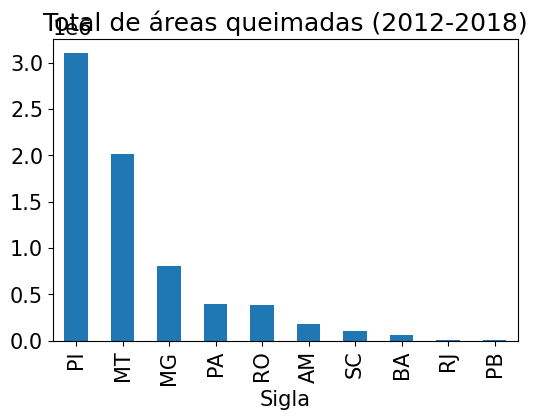

In [ ]:
DataFrameTotalQAnos.plot.bar(x='Sigla', y='Área queimada (2012-2018)', legend=False)
plt.title("Total de áreas queimadas (2012-2018)")

#Parte II: Desmatamentos em unidades de conservação ambiental no Brasil

##O segundo conjunto de dados link 2 traz dados sobre desmatamento em unidades de conservação ambiental (UC).
##Para essa conjunto de dados, observe-o, e elabore seis perguntas que você possa responder usando os dados desse conjunto. Responda cada uma delas, analisando os resultados obtidos, e, se possível, use gráficos, medidas e tabelas para ilustrar sua discussão.

Importando dataframe:

In [ ]:
DesmatamentosUC = pd.read_csv("/content/DIMIF_desmatamento.csv", sep=';')

Removendo uma linha e 3 colunas que não tem informações relevantes:


In [ ]:
DesmatamentosUC = DesmatamentosUC.drop(index=0, columns=['Unnamed: 21', 'Unnamed: 31', 'Unnamed: 32'])          

*   # 2.1 - Com uma tabela, mostre a quantidade de areas desmatadas em cada ano e em cada estado.

Função que recebe a coluna de estados com o nome completo e remove toda a informação, fora a sigla do estado. O retorno da função já é dado como uma Series.

In [ ]:
def estadosCorrespondentes(EstadosColuna): # cria lista com Estados correspondentes de cada área Desmatada obtida anteriormente

  Estados = EstadosColuna.apply(lambda x: x[-2:])
  Estados = pd.Series(Estados)
  return Estados

A função a seguir utiliza a função "ajustes" da questão anterior para consertar os valores de área desmatada, que contém vírgulas como separador de decimal e pontos para unidades de milhar. Após isso, utiliza a função anteiror para criar uma Serie com o nome de todos os estados por sigla.

Então, utiliza as duas series feitas para criarem um dataframe, contendo os anos e sigla de estados, a partir da concatenação (.concat) na vertical (axis=1). As funções .dropna e reset_index são utilizadas para remover a ocorrência de valores NaN e recolocar os índices em ordem crescente novamente, respectivamente.

In [ ]:
def CriandoDataframe(AnoDesmatada): # Cria duas Series com as informações anteriores e cria um DataFrame

  AreaD = ajustes(AnoDesmatada) #Consertando os índices, pois estão variados
  EstadoAreaD = estadosCorrespondentes(DesmatamentosUC['Coordenação Regional do ICMBio'])
  Area = pd.concat([EstadoAreaD, AreaD], axis=1)
  Area = Area.dropna().reset_index(drop=True) # removendo NaN e consertando os índices para ficarem em ordem
  
  return Area

Nesta função é criada um dataframe com a função anterior, contendo ano e quantidade de área devastada por estado. A seguir, é feita uma lista contendo 10 posições, onde serão armazenadas a soma da quantidade de área devastada de acordo com a sigla do estado. Para isso, foi criado um for que compara se a sigla do estado é igual a do que se quer encontrar, então, se é feita a soma na posição certa, seguindo a ordem de estados presente dentro do for. Quando toda a operação do for é feita, tem-se uma lista com os valores da soma da área total devastada por estado.

In [ ]:
def somandoDesmatamentoEstados(DataframeDesmatamentos, AreaDesmatamento):

  Area = CriandoDataframe(DataframeDesmatamentos)
  SomaFinal = [0]*10
  
  for i in range(len(Area[AreaDesmatamento].values)):

    if Area['Coordenação Regional do ICMBio'][i] == 'PA': SomaFinal[0] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'SC': SomaFinal[1] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'RO': SomaFinal[2] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'RJ': SomaFinal[3] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'PB': SomaFinal[4] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'BA': SomaFinal[5] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'MG': SomaFinal[6] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'AM': SomaFinal[7] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'PI': SomaFinal[8] += Area[AreaDesmatamento][i]
    elif Area['Coordenação Regional do ICMBio'][i] == 'MT': SomaFinal[9] += Area[AreaDesmatamento][i]

  return SomaFinal

Aqui são criadas 20 variáveis contendo uma lista com a soma de área queimada por estado. Cada variável armazenará um ano ou mais.

In [ ]:
SomaAreaD2018 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2018'], 'PRODES 2018'))
SomaAreaD2017 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2017'], 'PRODES 2017'))
SomaAreaD2016 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2016'], 'PRODES 2016'))
SomaAreaD2015 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2015'], 'PRODES 2015'))
SomaAreaD2014 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2014'], 'PRODES 2014'))
SomaAreaD2013 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2013'], 'PRODES 2013'))
SomaAreaD2012 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2012'], 'PRODES 2012'))
SomaAreaD2011 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2011'], 'PRODES 2011'))
SomaAreaD2010 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2010'], 'PRODES 2010'))
SomaAreaD2009 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2009'], 'PRODES 2009'))
SomaAreaD2008 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2008'], 'PRODES 2008'))
SomaAreaD2007 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2007'], 'PRODES 2007'))
SomaAreaD2006 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2006'], 'PRODES 2006'))
SomaAreaD2005 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2005'], 'PRODES 2005'))
SomaAreaD2004 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2004'], 'PRODES 2004'))
SomaAreaD2003 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2003'], 'PRODES 2003'))
SomaAreaD2002 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2002'], 'PRODES 2002'))
SomaAreaD2001 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES 2001'], 'PRODES 2001'))
SomaAreaD2000 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES (1998 até 2000)'], 'PRODES (1998 até 2000)'))
SomaAreaD1997 = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['PRODES (acumulado até 1997)'], 'PRODES (acumulado até 1997)'))

Nessa etapa, se é criada uma variável para armazenar a sigla de todos estados. Após isso é feito um dataframe concatenando todas as variáveis criadas anteriormente, consertando as colunas para melhor entendimento de informações.

In [ ]:
SiglasEstados = pd.Series(DesmatamentosUC['Coordenação Regional do ICMBio'].apply(lambda x: x[-2:]).value_counts().index)

DataFrameTotalDAnos = pd.concat([SiglasEstados,SomaAreaD1997,SomaAreaD2000,SomaAreaD2001,SomaAreaD2002,SomaAreaD2003,SomaAreaD2004,SomaAreaD2005,SomaAreaD2006,SomaAreaD2007,SomaAreaD2008,SomaAreaD2009,SomaAreaD2010,SomaAreaD2011,SomaAreaD2012,SomaAreaD2013,SomaAreaD2014,SomaAreaD2015,SomaAreaD2016,SomaAreaD2017,SomaAreaD2018], axis=1)

DataFrameTotalDAnos.columns = ['Sigla', 'Até 1997',"1998 até 2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
DataFrameTotalDAnos

,Sigla,Até 1997,1998 até 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,PA,221080.2,51709.9,76108.7,51902.6,64140.7,86849.8,41875.3,20455.7,28776.5,24910.2,23683.0,10835.1,8279.3,14252.9,15567.4,14725.3,19266.3,16982.4,12555.9,19512.7
1,RO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SC,66448.2,21451.1,7272.2,5928.0,16903.6,12571.3,15353.2,9799.5,8039.0,6968.3,2086.7,4716.3,4669.3,4150.1,3834.5,4093.2,2461.4,4492.6,4451.5,4953.5
3,RJ,0.0,3608.0,3.7,3.7,0.0,0.0,1.8,1.8,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.1,0.0,0.0,0.0
4,PB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AM,0.0,4729.8,68.4,68.4,719.2,719.2,231.1,231.1,335.7,335.7,75.6,75.6,118.7,118.7,3.8,3.6,11.6,25.5,5.1,243.9
6,BA,0.0,346667.8,4695.8,4695.8,22500.5,22500.5,7650.0,7650.0,4458.6,4458.6,3707.8,3707.8,3453.2,3453.2,5404.7,6148.2,2114.0,1378.7,2287.1,2414.7
7,MG,28228.8,8680.1,5043.6,2010.2,1491.2,518.2,725.9,435.6,488.0,1374.2,526.7,2059.1,604.0,171.9,385.9,895.4,137.7,596.0,398.3,424.6
8,PI,0.0,22771.1,3366.6,3366.6,4701.6,4701.6,2978.4,2978.4,5478.7,5478.7,1852.8,1852.8,3633.4,3633.4,2744.7,4013.9,3983.3,845.9,1109.4,4046.0
9,MT,9020.0,5865.0,520.8,542.7,267.3,288.8,695.1,71.1,1966.2,1928.6,77.3,120.4,135.4,599.0,690.3,144.6,55.8,7.9,10.0,265.6


*   # 2.2 - Quais os estados com mais áreas contendo UC's ?


Criando Series com a soma de toda a área contendo UC's com a função "somandoDesmatamentoEstados", criada anteriormente, e convertendo para inteiros. Então, criando um dataframe contendo as siglas de cada estado correspondente e o valor de área de UC's. Para visualização correta dos dados foram colocadas nome nas colunas, ordenados os dados pela quantidade de área e resetando o índices para ficarem novamente em ordem.

In [ ]:
EstadosAreasUC = pd.Series(somandoDesmatamentoEstados(DesmatamentosUC['Área estimada da UC (ha)'], 'Área estimada da UC (ha)')).astype('int64')

DataFrameTotalDAreas = pd.concat([SiglasEstados, EstadosAreasUC], axis=1)

DataFrameTotalDAreas.columns = ['Sigla', 'Área de UCs (ha)(1997-2018)']
DataFrameTotalDAreas.sort_values(by=['Área de UCs (ha)(1997-2018)'], inplace=True,ascending=False)
DataFrameTotalDAreas.reset_index(drop=True) # consertando os índices para ficarem em ordem

,Sigla,Área de UCs (ha)(1997-2018)
0,PA,27289947
1,SC,20442548
2,MG,16754848
3,PI,4869580
4,RO,2460002
5,BA,2179002
6,PB,1800683
7,MT,1565043
8,RJ,1541694
9,AM,920338


Gráfico para uma melhor visualização dos dados acima criados.

Text(0.5, 1.0, 'Total de áreas com UCs (1997-2018)')

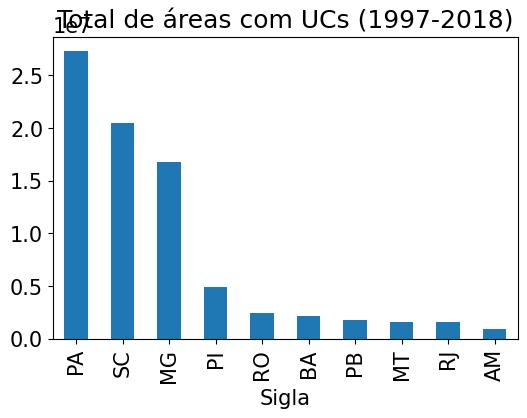

In [ ]:
DataFrameTotalDAreas.plot.bar(x='Sigla', y='Área de UCs (ha)(1997-2018)', legend=False)
plt.title("Total de áreas com UCs (1997-2018)")

*   # 2.3 - Qual o **bioma** que mais e o que menos tem unidades de conservação ? Quais são os mais e menos monitorados ?



Primeiro, temos uma lista que receberá todos os biomas que tem monitoramento PRODES.

In [ ]:
QuantBUMP = []

for i in range(1, len(DesmatamentosUC['Monitoramento PRODES'])):
  if (DesmatamentosUC['Monitoramento PRODES'][i] == "Sim"): 
    QuantBUMP.append(DesmatamentosUC['Bioma referencial'][i])

Com essa lista será criado uma series com todos os biomas da lista anterior.
Então, serão criadas mais duas Series, uma com todos os nomes dos biomas no dataframe e outro com a quantidade que eles aparecem.

Após isso serão concatenadas as informações para a criação do dataframe que irá comparar a quantidade de UC's existentes com a quantidade de UC's monitoradas.

In [ ]:
QuantBUMP = pd.Series(QuantBUMP)
QuantBUMP = pd.Series(QuantBUMP.value_counts().values)
Biomas = pd.Series(DesmatamentosUC['Bioma referencial'].value_counts().index)
QuantBiomasTotais = pd.Series(DesmatamentosUC['Bioma referencial'].value_counts().values)

DataFrameBiomas = pd.concat([Biomas, QuantBiomasTotais, QuantBUMP], axis=1)
DataFrameBiomas.columns = ['Biomas', 'Total de UCs', 'Total de UCs monitoradas']
DataFrameBiomas

,Biomas,Total de UCs,Total de UCs monitoradas
0,Amazônia,128,125.0
1,Mata Atlântica,92,43.0
2,Cerrado,45,3.0
3,Marinho-Costeiro,33,2.0
4,Caatinga,24,1.0
5,Pampas,3,NaN
6,Pantanal,2,NaN


Gráfico para uma melhor visualização dos dados acima criados.

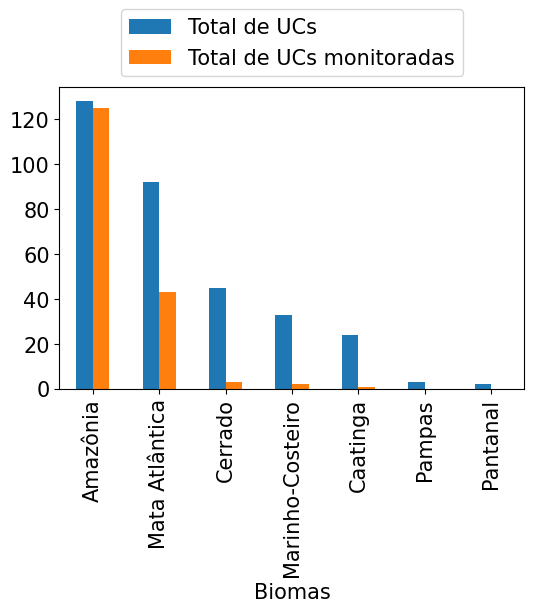

In [ ]:
DataFrameBiomas.plot.bar(x='Biomas')
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center') 

*   # 2.4 - Qual o **estado** que mais e o que menos tem unidades de monitoramento do PRODES (U.M.P.)?



Seguindo a lógica da questão anterior, temos uma lista que receberá informações, mas dessa vez serão todos os estados que tem monitoramento PRODES. Então, iremos transformar os dados numa Series, depois pegar apenas as siglas dos estados e então fazer a criação do dataframe com a contagem de estados presentes, pois eles já serão a quantidade de estados monitorados.

In [ ]:
QuantEUMP = []

for i in range(1, len(DesmatamentosUC['Monitoramento PRODES'])):
  if (DesmatamentosUC['Monitoramento PRODES'][i] == "Sim"): 
    QuantEUMP.append(DesmatamentosUC['Coordenação Regional do ICMBio'][i])

QuantEUMP = pd.Series(QuantEUMP)
QuantEUMP = QuantEUMP.apply(lambda x: x[-2:])
QuantEUMP = pd.DataFrame(QuantEUMP.value_counts())
QuantEUMP.columns = ['Quant. U.M.P.']
QuantEUMP

,Quant. U.M.P.
PA,62
RO,40
AM,27
MG,22
PI,11
MT,8
RJ,3
BA,1


Gráfico para uma melhor visualização dos dados acima criados.

Text(0.5, 1.0, 'Quantidade U.M.P.')

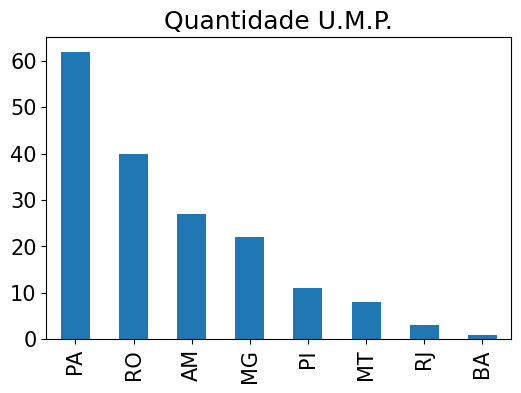

In [ ]:
QuantUMP.plot.bar(legend=False)
plt.title('Quantidade U.M.P.')

*   # 2.5 - Qual categoria de UC é mais presente em cada estado ?


Aqui utilizaremos a função 'crosstab' para criarmos um DataFrame unindo informações entre duas colunas do DataFrame original, um contendo a sigla das UCs e outra a sigla dos estados. Após isso, utilizaremos o Dataframe criado como base para criação do gráfico, que será na horizontal (plot.barh) para melhor visualisação das informações. Também empilharemos as informações em comuns (Stacked=True), para poupar espaço e ajudar na leitura. E então, colocaremos o gráfico na parte esquerda da legenda, para não haver informações sobrepostas e adicionaremos um título (.title).

Text(0.5, 1.0, "Quant. de UC's por estados")

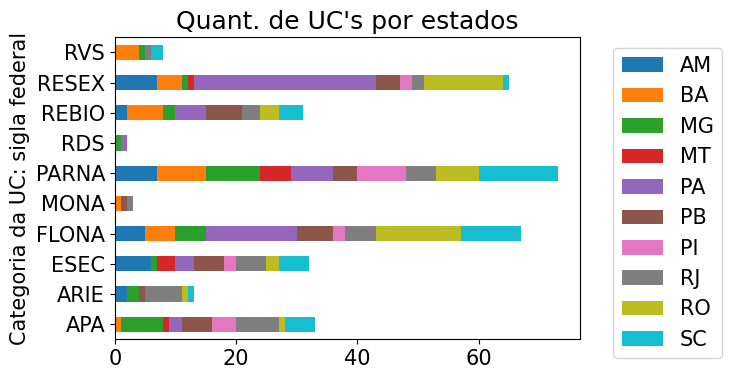

In [ ]:
TabelaUC = pd.crosstab(DesmatamentosUC['Categoria da UC: sigla federal'], DesmatamentosUC['Coordenação Regional do ICMBio'].apply(lambda x: x[-2:])) 
TabelaUC.plot.barh(stacked=True) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title("Quant. de UC's por estados") 

*   # 2.6 - Qual presidente estava em vigência quando ouveram as maiores quantidades de desmatamento entre 2001 e 2018 ?

Primeiramente, há a criação de uma lista contendo a soma das variáveis criadas anteriormente, que continham as somas de área desmatada em cada estado e em cada ano, então transforma-se ela numa Series. Também se cria uma Series contendo os anos de 2001 até 2018.

Após isso é feita uma lista com os nomes dos presidentes que estavam em governo em cada ano, passando como parâmetro para a função "presidente", criada anteriormente, os anos da Series "TAnos", e então se cria uma Series. 

Então, é criado um dataframe unindo as informações criadas, nomes de presidentes, anos correspondentes ao seu governo e área devastada em tal ano. 
Para entendimento das informações, são colocados nomes nas respectivas colunas, ordenamento no dataframe, seguindo a ordem de área devastada, e corrigido os índices de forma a ficarem crescentes novamente, iniciando do 0.

In [ ]:
SomaTotalDesmatada = [SomaAreaD2001.sum(), SomaAreaD2002.sum(), SomaAreaD2003.sum(), SomaAreaD2004.sum(), SomaAreaD2005.sum(), SomaAreaD2006.sum(), SomaAreaD2007.sum(), SomaAreaD2008.sum(), SomaAreaD2009.sum(), SomaAreaD2010.sum(), SomaAreaD2011.sum(), SomaAreaD2012.sum(), SomaAreaD2013.sum(), SomaAreaD2014.sum(), SomaAreaD2015.sum(), SomaAreaD2016.sum(), SomaAreaD2017.sum(), SomaAreaD2018.sum()]
SomaTotalDesmatada = pd.Series(SomaTotalDesmatada)

TAnos = pd.Series([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

PresidentesD = []
for i in range(len(TAnos)): PresidentesD.append(presidente(TAnos[i]))
PresidentesD = pd.Series(PresidentesD)

DataFrameTotal = pd.concat([PresidentesD, TAnos, SomaTotalDesmatada], axis=1)

DataFrameTotal.columns = ['Presidentes', 'Anos', 'Área total devastada (ha)']
DataFrameTotal.sort_values(by=['Área total devastada (ha)'], inplace=True,ascending=False)
DataFrameTotal.reset_index(drop=True) # consertando os índices para ficarem em ordem 

,Presidentes,Anos,Área total devastada (ha)
0,Luiz Inácio Lula da Silva,2004,128149.4
1,Luiz Inácio Lula da Silva,2003,110724.1
2,Fernando Henrique Cardoso,2001,97079.8
3,Luiz Inácio Lula da Silva,2005,69510.8
4,Fernando Henrique Cardoso,2002,68518.0
5,Luiz Inácio Lula da Silva,2007,49542.7
6,Luiz Inácio Lula da Silva,2008,45454.3
7,Luiz Inácio Lula da Silva,2006,41623.2
8,Luiz Inácio Lula da Silva,2009,32009.9
9,Michel Temer,2018,31861.0
